In [3]:
import pandas as pd


In [4]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [5]:
ev_data.info()

#shows concise summary of a dataframe
#shows non-null values
#shows dtype of each column
#gives memory usage of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
ev_data.isnull().sum()

#isnull() : checks missing or null vals
#sum() : sums up true vals of null vals

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
ev_data = ev_data.dropna()

#for droping rows with NaN OR null values 
#used for removing missing or NaN(Not A Number)
# can use 'how' and 'thresh' parameters

 ## Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_style("whitegrid")
#makes grid lines to plot

In [10]:
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
#figure size plot

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

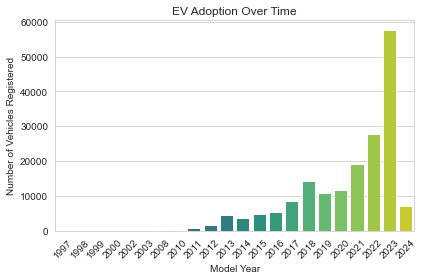

In [11]:
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
#counting unique values and sorting acc indexes.

sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")

""" makes bar plot with x and y values along with palette Using palette="viridis" in your 
plots ensures that a color scheme that is not only aesthetically pleasing but also supports 
clear and accurate data communication, making it particularly useful in scientific and 
data-driven visualizations. """

plt.title('EV Adoption Over Time')
#giving title to plot

plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')

plt.xticks(rotation=45)
plt.tight_layout()
""" Using plt.tight_layout() ensures that your plots are visually appealing and that
elements like titles and labels are appropriately spaced, enhancing readability and presentation."""

plt.show()

# Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

In [18]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
#.head selects first 3 rows of df or series
# .index retrieves the index labels associated with 3 rows

In [19]:
# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

In [13]:
# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size()
.sort_values(ascending=False).reset_index(name='Number of Vehicles')


In [20]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

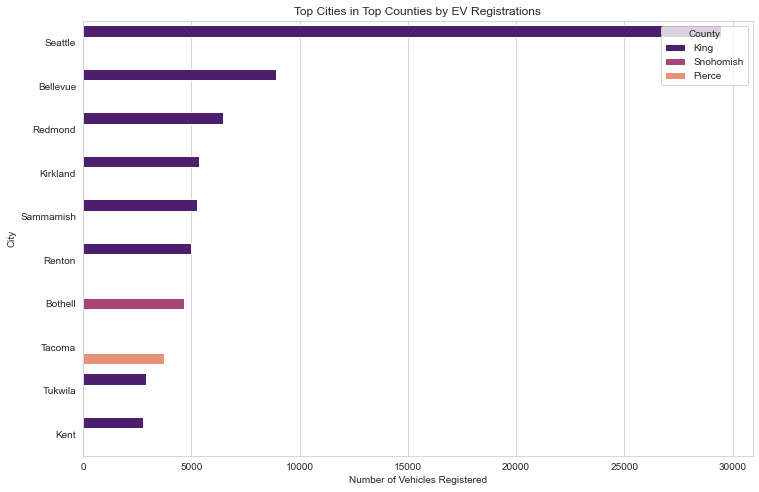

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.show()

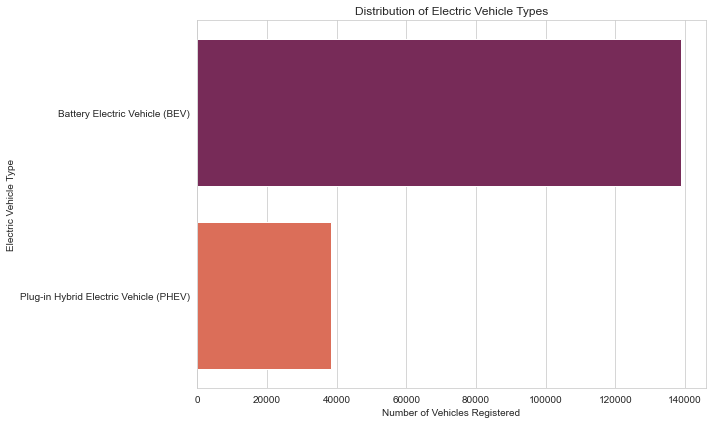

In [16]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

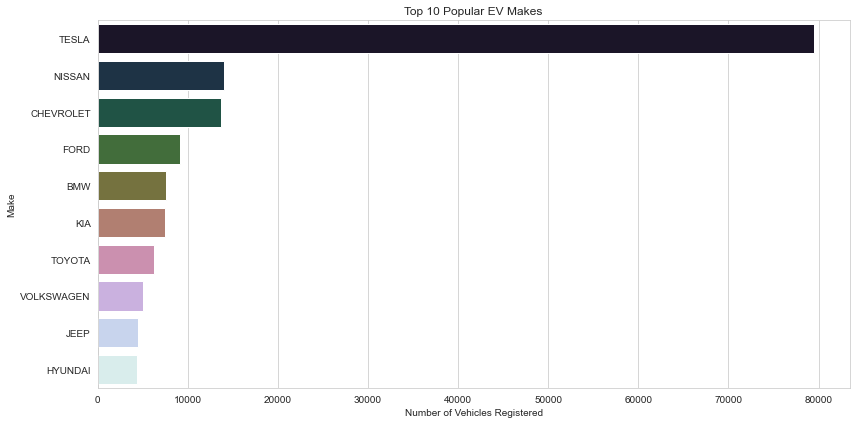

In [17]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

# Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:



In [21]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

In [22]:
# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

In [23]:
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).
size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)


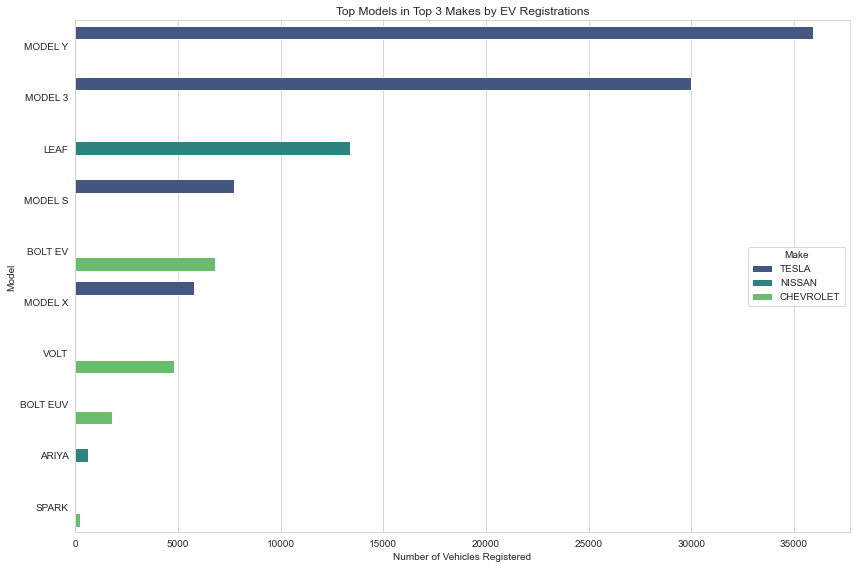

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

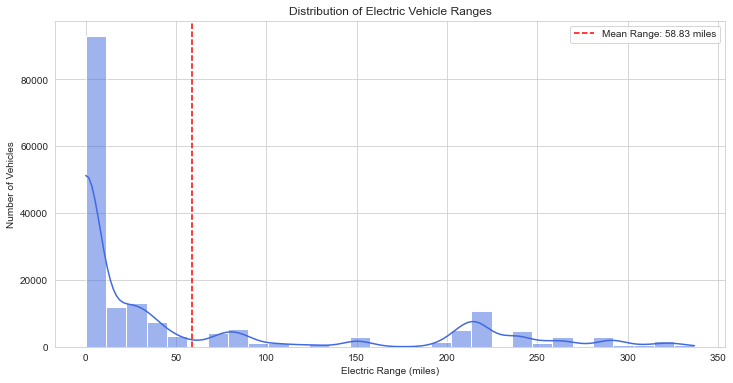

In [25]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', 
            label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

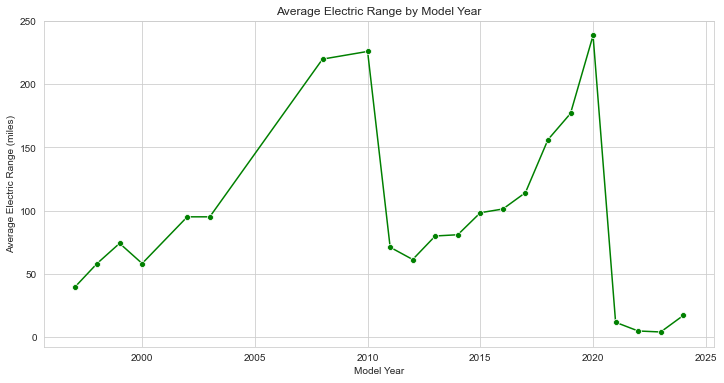

In [26]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [ ]:
# The data suggest that while there have been fluctuations, the overall trend 
# over the last two decades has been toward increasing the electric range of EVs.


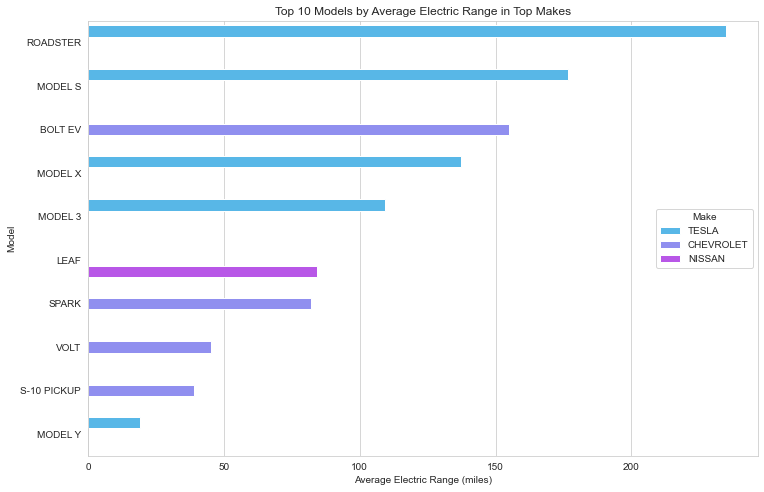

In [27]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].
mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [ ]:
""" The TESLA ROADSTER has the highest average electric range among the models listed. 
TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of 
the top positions, indicating that on average, TESLA’s vehicles have higher 
electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, 
having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. 
NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, 
suggesting more modest average ranges."""

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [28]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

In [29]:
"""
The dataset provides the number of electric vehicles registered each year from 1997 through 2024. 
However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary
of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.
For 2024, currently, 7,072 EVs are registered, which suggests partial data.

"""

'\nThe dataset provides the number of electric vehicles registered each year from 1997 through 2024. \nHowever, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary\nof EV registrations for recent years:\n\nIn 2021, there were 19,063 EVs registered.\nIn 2022, the number increased to 27708 EVs.\nIn 2023, a significant jump to 57,519 EVs was observed.\nFor 2024, currently, 7,072 EVs are registered, which suggests partial data.\n\n'

In [ ]:
# To forecast the total number of EVs expected to be registered in 2024, 
# we can use a growth rate based approach from previous complete years.

"""
We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent 
year with complete data (2023) and an earlier year to project the 2024 
figures. Additionally, using this growth rate, we can estimate the market 
size for the next five years. Let’s proceed with these calculations:

"""

In [30]:
from scipy.optimize import curve_fit
import numpy as np

In [31]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [32]:
# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [33]:
# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [34]:
# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

In [35]:
# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20757174547, 2025: 119653.96147947006, 2026: 181047.21756020613, 2027: 273940.74196128093, 2028: 414497.00866759784, 2029: 627171.2961143625}


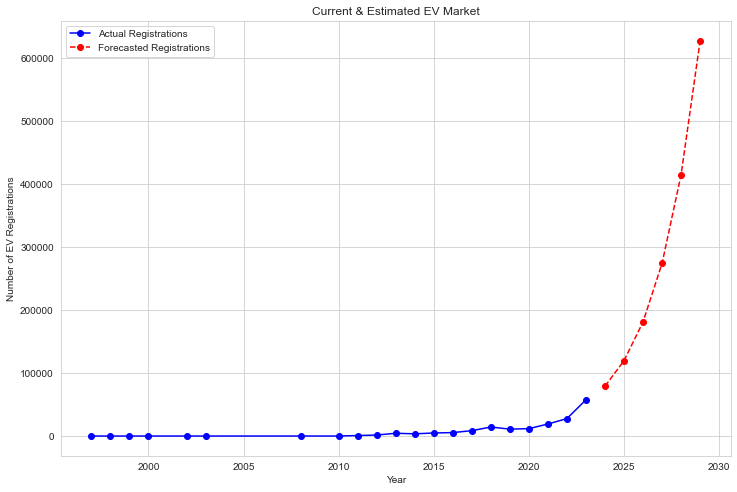

In [36]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
"""

From the above graph, we can see:

The number of actual EV registrations remained relatively low and stable until around 2010,
after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
The forecasted EV registrations predict an even more dramatic increase in the near future, 
with the number of registrations expected to rise sharply in the coming years

"""